In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import numpy as np 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from helpers import plot
from pre_processing import pre_processing

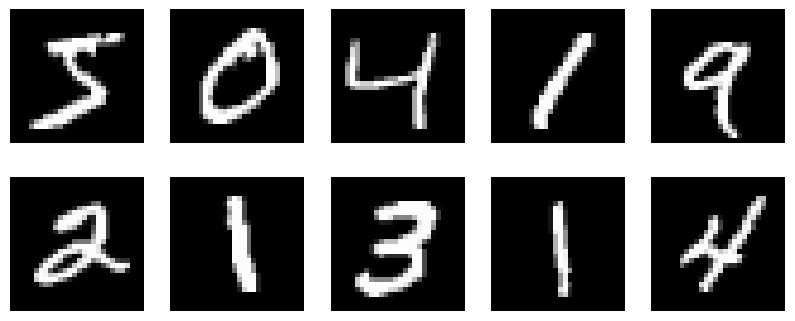

Normalizing...: 100%|██████████| 10000/10000 [00:00<00:00, 222170.05it/s]


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
plot.display_imgs(x_train)

x_train, y_train, encoder, classes = pre_processing.pre_processing(x_train, y_train)
x_test, y_test, encoder, classes = pre_processing.pre_processing(x_test, y_test, encoder)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step - accuracy: 0.8543 - loss: 0.5241 - val_accuracy: 0.9097 - val_loss: 0.3149
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step - accuracy: 0.9114 - loss: 0.3113 - val_accuracy: 0.9137 - val_loss: 0.2985
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 942us/step - accuracy: 0.9158 - loss: 0.3003 - val_accuracy: 0.9208 - val_loss: 0.2859
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - accuracy: 0.9189 - loss: 0.2852 - val_accuracy: 0.9200 - val_loss: 0.2852
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - accuracy: 0.9203 - loss: 0.2831 - val_accuracy: 0.9240 - val_loss: 0.2763
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step - accuracy: 0.9223 - loss: 0.2776 - val_accuracy: 0.9209 - val_loss: 0.2866
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.9224 - loss: 0.2733 - val_accuracy: 0.9216 - val_loss: 0.2830
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - accuracy: 0.9242 -

d:\hoc-AI-ML\Học AI\OREILLY DL from scratch\Mnist_Handwriting_Digit\helpers\plot.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


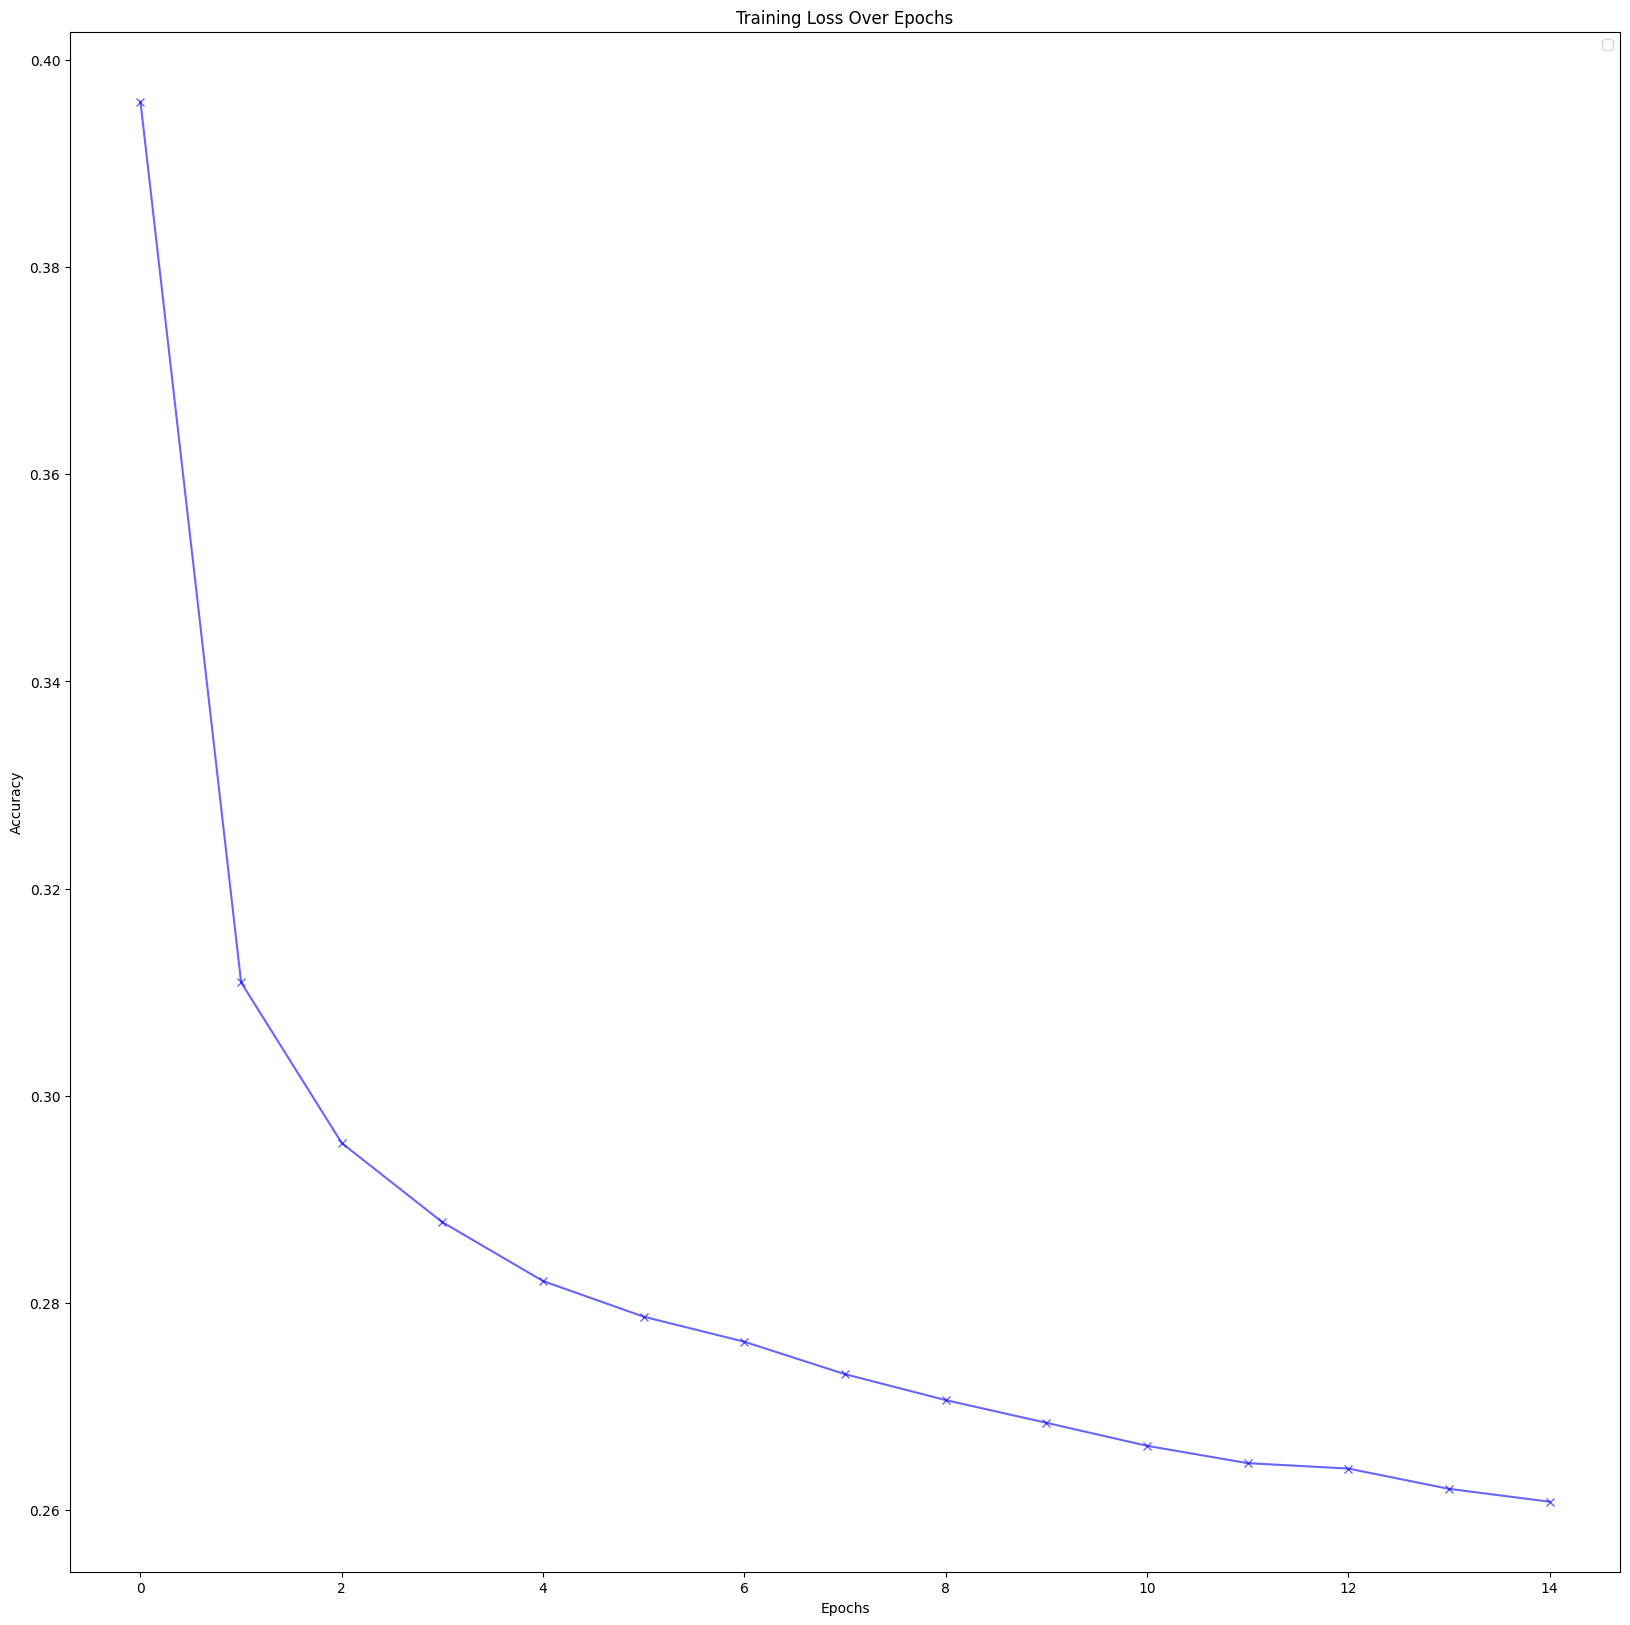

In [3]:
from models import Softmax_Regression

softmax_regression = Softmax_Regression.SoftmaxRegression(
    input_shape = x_train[0].shape,
    output_shape = len(classes),
    learning_rate = 0.1,
    epochs = 15,
    batchsize = 16
)

softmax_regression.fit(X = x_train, y = y_train)

In [4]:
y_predict_prob = softmax_regression.predict(x_test)
y_predict = np.argmax(y_predict_prob, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_predict)
print(f"Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
Accuracy: 0.9223


In [5]:
print("\nClassification Report:")
print(classification_report(y_true, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.94      0.88      0.91      1010
           4       0.96      0.92      0.94       982
           5       0.83      0.91      0.87       892
           6       0.92      0.96      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.87      0.88       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



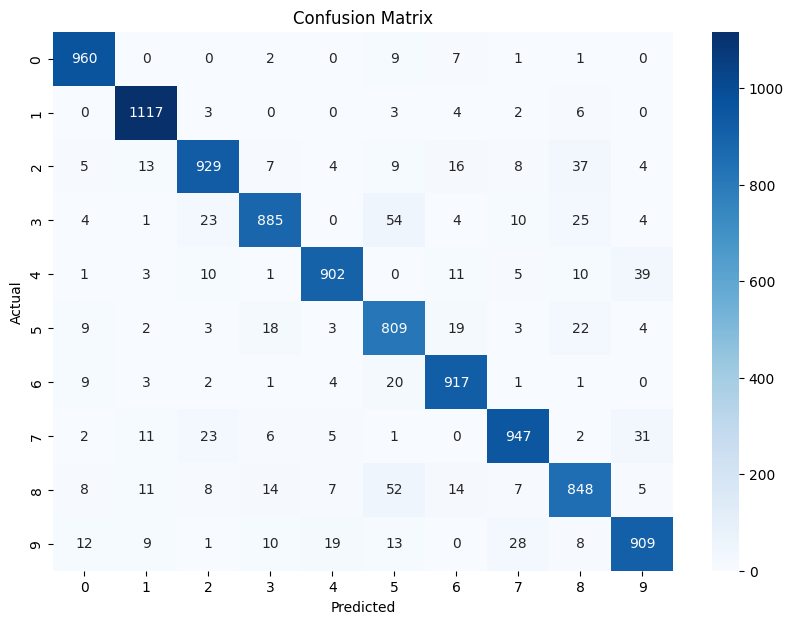

In [6]:
conf_matrix = confusion_matrix(y_true, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8669 - loss: 0.4275 - val_accuracy: 0.9751 - val_loss: 0.1153
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9378 - loss: 0.2249 - val_accuracy: 0.9697 - val_loss: 0.1040
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9387 - loss: 0.2264 - val_accuracy: 0.9643 - val_loss: 0.1402
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9425 - loss: 0.2187 - val_accuracy: 0.9734 - val_loss: 0.1226
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9425 - loss: 0.2136 - val_accuracy: 0.9765 - val_loss: 0.1081
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9378 - loss: 0.2343 - val_accuracy: 0.9714 - val_loss: 0.1431
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9422 - loss: 0.2287 - val_accuracy: 0.9687 - val_loss: 0.1230
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9442 - loss: 0

d:\hoc-AI-ML\Học AI\OREILLY DL from scratch\Mnist_Handwriting_Digit\helpers\plot.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


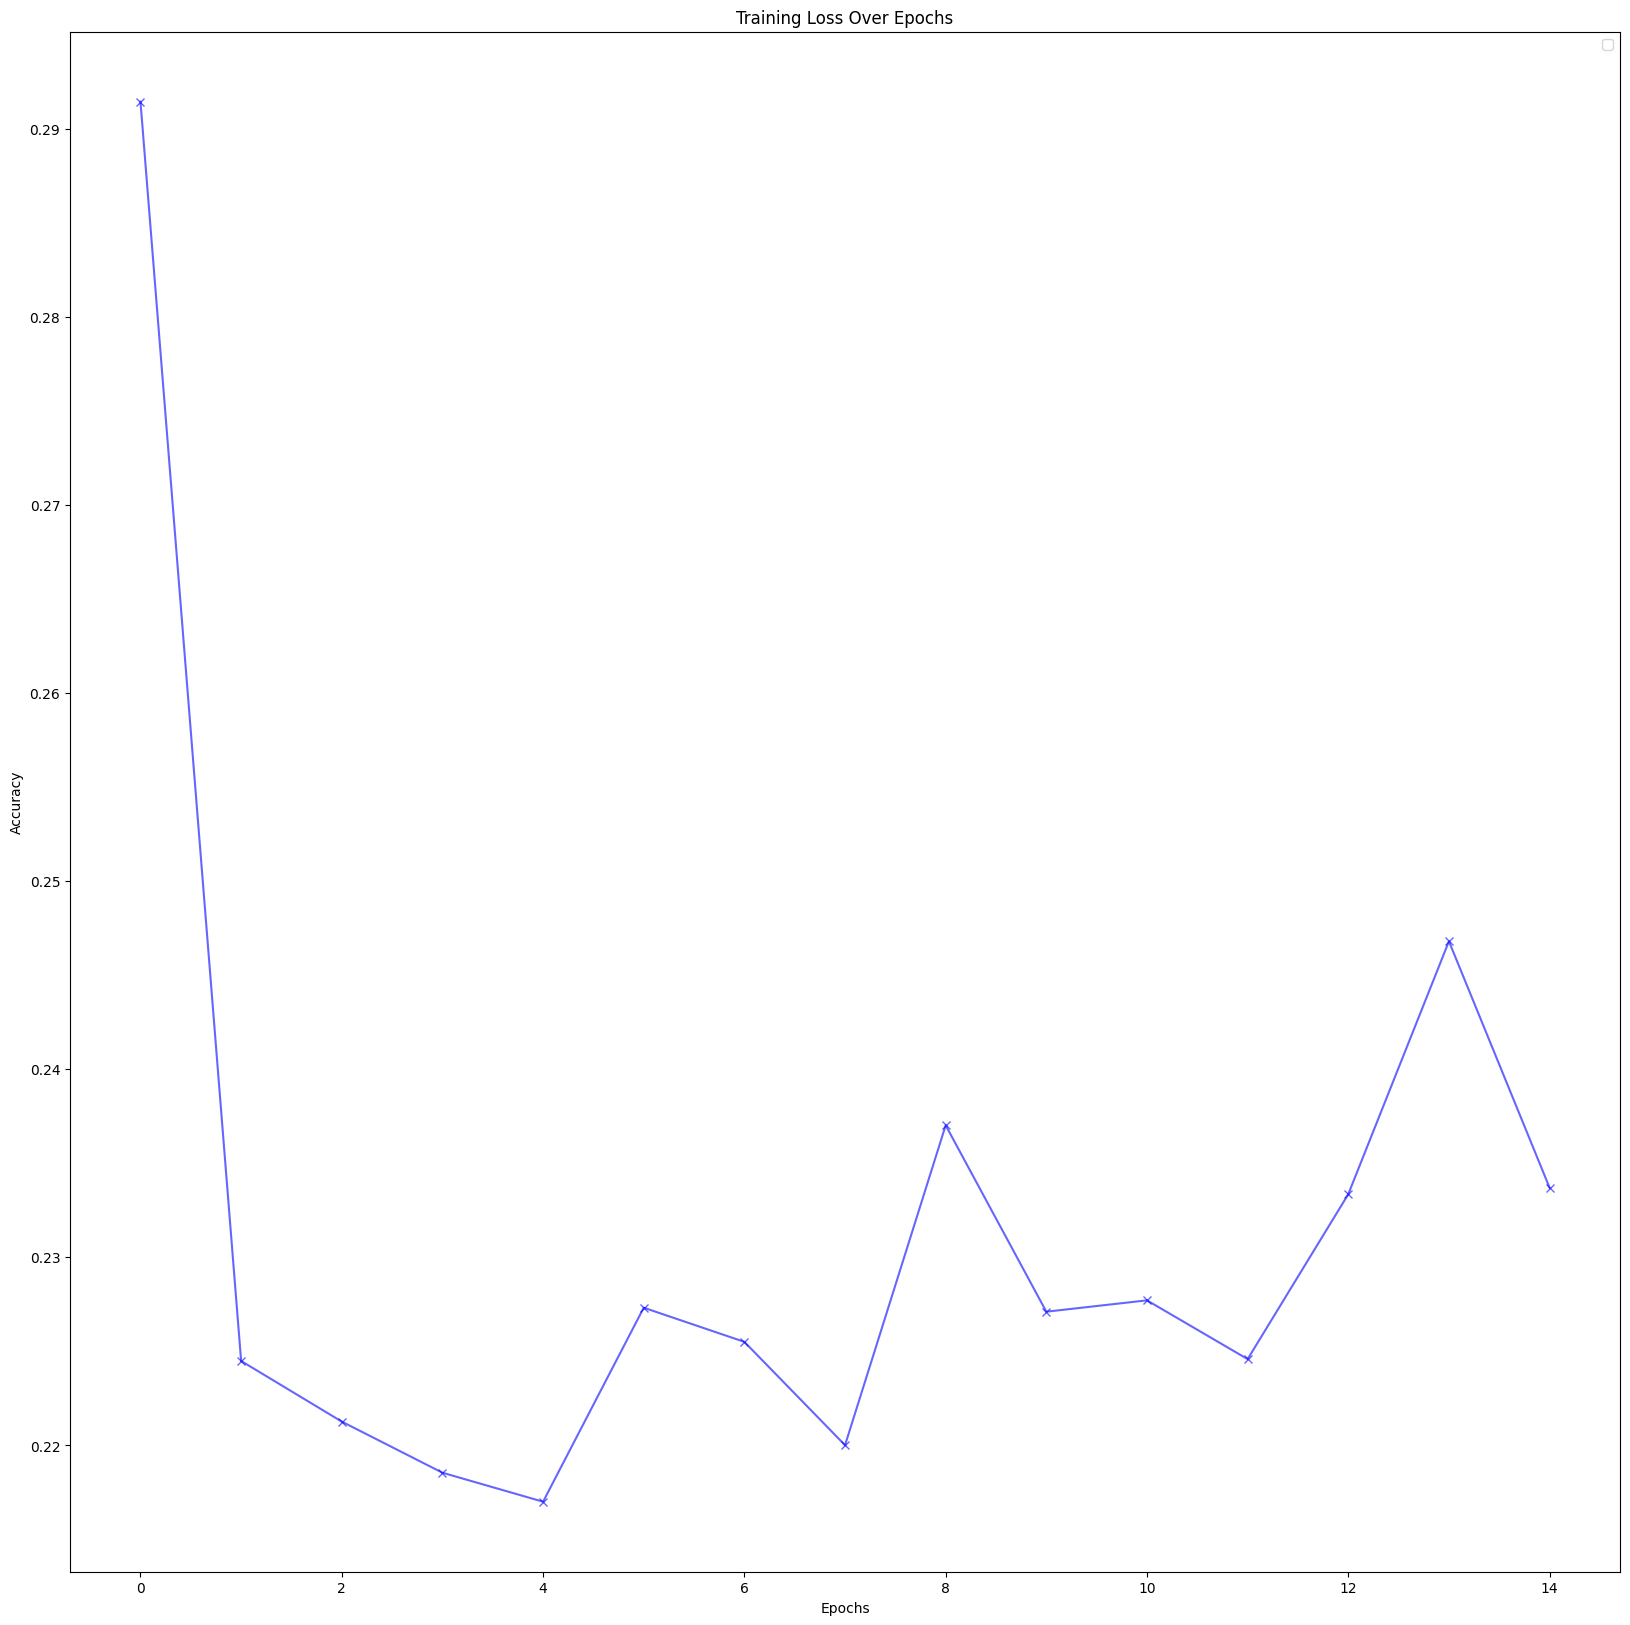

In [7]:
from models import CNN

if len(x_train[0].shape) != 3:
    x_train = np.expand_dims(x_train, axis=-1)

basic_cnn = CNN.CNN(
    input_shape = x_train[0].shape,
    output_shape = len(classes),
    lr = 0.01,
    epochs = 15,
    batch_size = 16
)

basic_cnn.fit(x_train, y_train)

In [8]:
if len(x_test[0].shape) != 3:
    x_test = np.expand_dims(x_test, axis=-1)

y_predict_prob = basic_cnn.predict(x_test)
y_predict = np.argmax(y_predict_prob, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_predict)
print(f"Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9672


In [9]:
print("\nClassification Report:")
print(classification_report(y_true, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.99      0.94      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.94      0.98      0.96      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



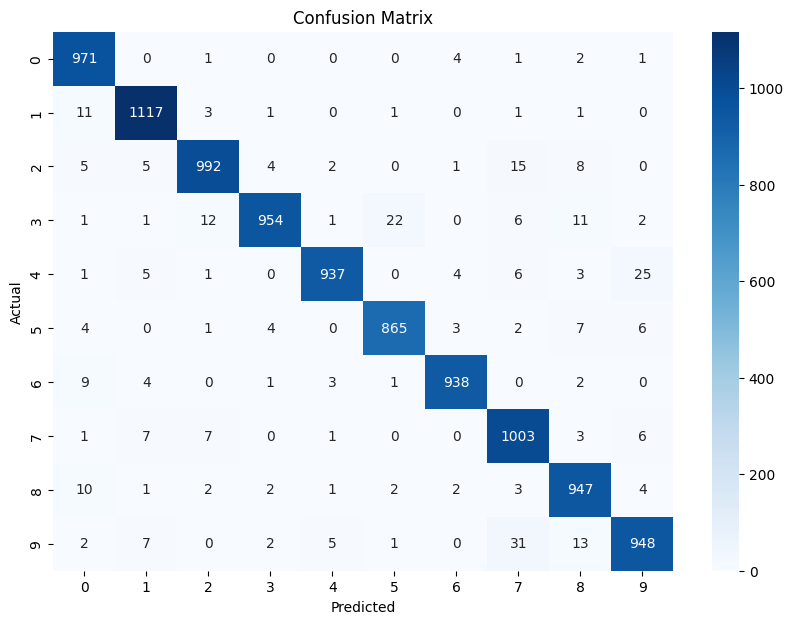

In [10]:
conf_matrix = confusion_matrix(y_true, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

